# Importação das Bibliotecas 

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np 

# --- Configurações Globais para Visualização de Gráficos ---

In [ ]:

sns.set_style("whitegrid") # Define o estilo dos gráficos para um fundo branco com grade
plt.rcParams['figure.figsize'] = (12, 7) # Tamanho padrão para figuras
plt.rcParams['axes.titlesize'] = 16 # Tamanho da fonte para títulos de eixos
plt.rcParams['axes.labelsize'] = 14 # Tamanho da fonte para rótulos de eixos
plt.rcParams['xtick.labelsize'] = 12 # Tamanho da fonte para rótulos do eixo X
plt.rcParams['ytick.labelsize'] = 12 # Tamanho da fonte para rótulos do eixo Y
plt.rcParams['legend.fontsize'] = 12 # Tamanho da fonte para legendas

# 1. Carregar o dataset

In [ ]:

file_path = 'hotel.csv' 
try:
    df = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' carregado com sucesso.")
except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado. Certifique-se de que o arquivo está no mesmo diretório do seu notebook.")
    df = None

if df is not None:
    print("\n--- Primeiras 5 linhas do DataFrame ---")
    display(df.head()) 

    print("\n--- Informações do DataFrame (Tipos de Dados e Não-Nulos) ---")
    df.info()

    print("\n--- Estatísticas Descritivas dos Dados Numéricos ---")
    display(df.describe()) 

    print("\n--- Contagem de Valores Nulos por Coluna ---")
    print(df.isnull().sum())

Dataset 'hotel.csv' carregado com sucesso.

--- Primeiras 5 linhas do DataFrame ---


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled



--- Informações do DataFrame (Tipos de Dados e Não-Nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month      

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000



--- Contagem de Valores Nulos por Coluna ---
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


### 1.1 Dicionário de Dados do Dataset 

Para uma melhor compreensão das variáveis, apresentamos o dicionário de dados:

| Nome da Coluna                     | Tipo de Dado (Python/Pandas) | Descrição                                                                               | Observações                                                                        |
| :--------------------------------- | :--------------------------- | :-------------------------------------------------------------------------------------- | :--------------------------------------------------------------------------------- |
| `Booking_ID`                       | `object` (String)            | Identificador único para cada reserva.                                                  | Chave primária.                                                                    |
| `no_of_adults`                     | `int64` (Inteiro)            | Número de adultos na reserva.                                                           | Valores esperados: Inteiros positivos (e.g., 1, 2, 3).                             |
| `no_of_children`                   | `int64` (Inteiro)            | Número de crianças na reserva.                                                          | Valores esperados: Inteiros não negativos (e.g., 0, 1, 2).                         |
| `no_of_weekend_nights`             | `int64` (Inteiro)            | Número de noites de fim de semana (Sábado/Domingo) da reserva.                          | Valores esperados: Inteiros não negativos.                                         |
| `no_of_week_nights`                | `int64` (Inteiro)            | Número de noites de dia de semana (Segunda a Sexta) da reserva.                         | Valores esperados: Inteiros não negativos.                                         |
| `type_of_meal_plan`                | `object` (String)            | Tipo de plano de refeição selecionado para a reserva.                                   | Categórica. Exemplos: "Meal Plan 1", "Meal Plan 2", "No Meal".                     |
| `required_car_parking_space`       | `int64` (Inteiro)            | Indica se um espaço de estacionamento é necessário (0 = Não, 1 = Sim).                  | Booleana/Binária.                                                                  |
| `room_type_reserved`               | `object` (String)            | Tipo de quarto reservado pelo hóspede.                                                  | Categórica. Exemplos: "Room_Type 1", "Room_Type 2", etc.                           |
| `lead_time`                        | `int64` (Inteiro)            | Número de dias entre a data da reserva e a data de chegada.                             | Em dias. Valores maiores indicam reservas feitas com mais antecedência.            |
| `arrival_year`                     | `int64` (Inteiro)            | Ano de chegada da reserva.                                                              | Ex: 2017, 2018.                                                                    |
| `arrival_month`                    | `int64` (Inteiro)            | Mês de chegada da reserva.                                                              | 1 (Janeiro) a 12 (Dezembro).                                                       |
| `arrival_date`                     | `int64` (Inteiro)            | Dia do mês de chegada da reserva.                                                       | 1 a 31. Combinar com ano e mês para obter a data completa.                         |
| `market_segment_type`              | `object` (String)            | Tipo de segmento de mercado através do qual a reserva foi feita.                        | Categórica. Exemplos: "Online", "Offline", "Corporate", etc.                       |
| `repeated_guest`                   | `int64` (Inteiro)            | Indica se o hóspede já fez reservas anteriormente (0 = Não, 1 = Sim).                   | Booleana/Binária.                                                                  |
| `no_of_previous_cancellations`     | `int64` (Inteiro)            | Número de reservas anteriores do hóspede que foram canceladas.                          | Indica o histórico de cancelamento do hóspede.                                     |
| `no_of_previous_bookings_not_canceled` | `int64` (Inteiro)        | Número de reservas anteriores do hóspede que foram concluídas (não canceladas).         | Indica o histórico de reservas bem-sucedidas do hóspede.                           |
| `avg_price_per_room`               | `float64` (Float)            | Preço médio por quarto por noite na reserva.                                            | Valor monetário. Pode ser flutuante.                                               |
| `no_of_special_requests`           | `int64` (Inteiro)            | Número de pedidos especiais feitos pelo hóspede para a reserva.                         | Ex: cama extra, berço, vista específica. Valores esperados: Inteiros não negativos.|
| `booking_status`                   | `object` (String)            | Status final da reserva.                                                                | Categórica. Exemplos: "Canceled", "Not_Canceled", "No-Show".                       |


## 2. Análise Exploratória de Dados (EDA) - Análise Univariada


--- Variáveis Identificadas ---
Variáveis Quantitativas (14): ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Variáveis Categóricas (4): ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

##### Análise para Variáveis Quantitativas #####

--- Análise da Coluna Quantitativa: `no_of_adults` ---

Estatísticas Descritivas:


count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: no_of_adults, dtype: float64

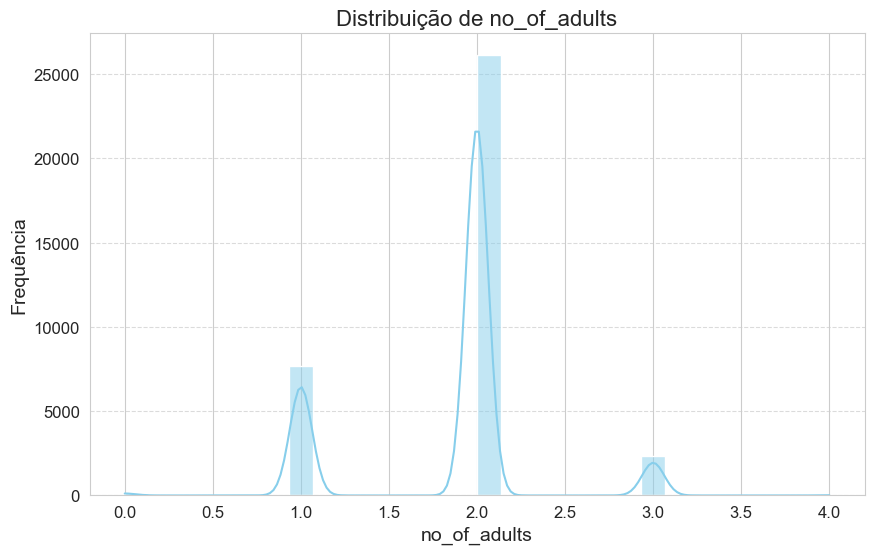

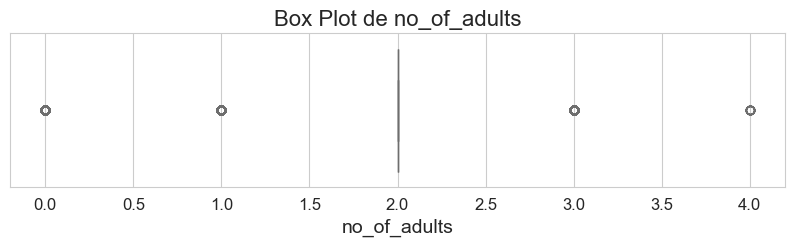


--- Análise da Coluna Quantitativa: `no_of_children` ---

Estatísticas Descritivas:


count    36275.000000
mean         0.105279
std          0.402648
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: no_of_children, dtype: float64

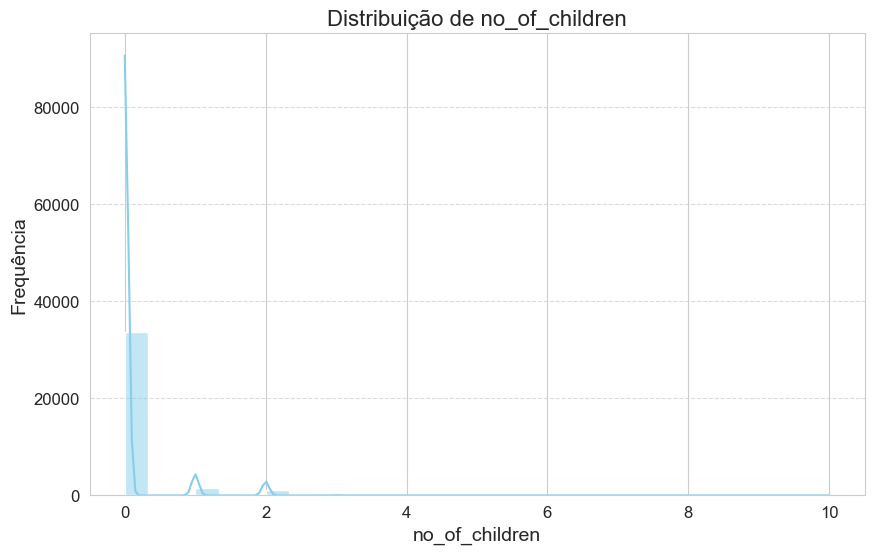

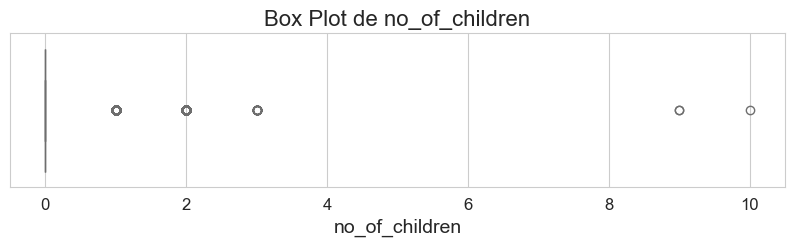


--- Análise da Coluna Quantitativa: `no_of_weekend_nights` ---

Estatísticas Descritivas:


count    36275.000000
mean         0.810724
std          0.870644
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: no_of_weekend_nights, dtype: float64

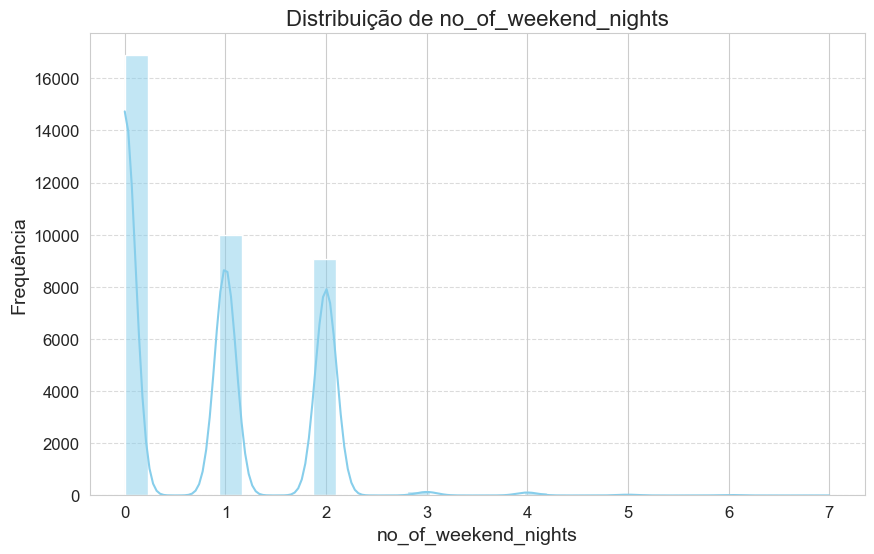

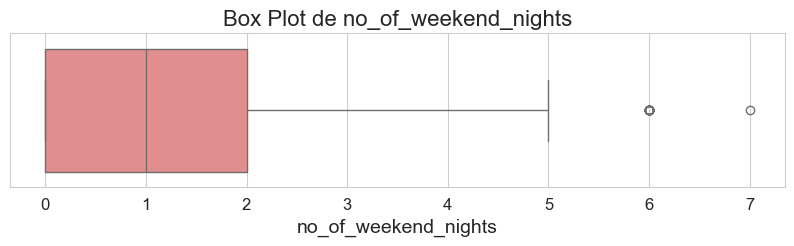


--- Análise da Coluna Quantitativa: `no_of_week_nights` ---

Estatísticas Descritivas:


count    36275.000000
mean         2.204300
std          1.410905
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: no_of_week_nights, dtype: float64

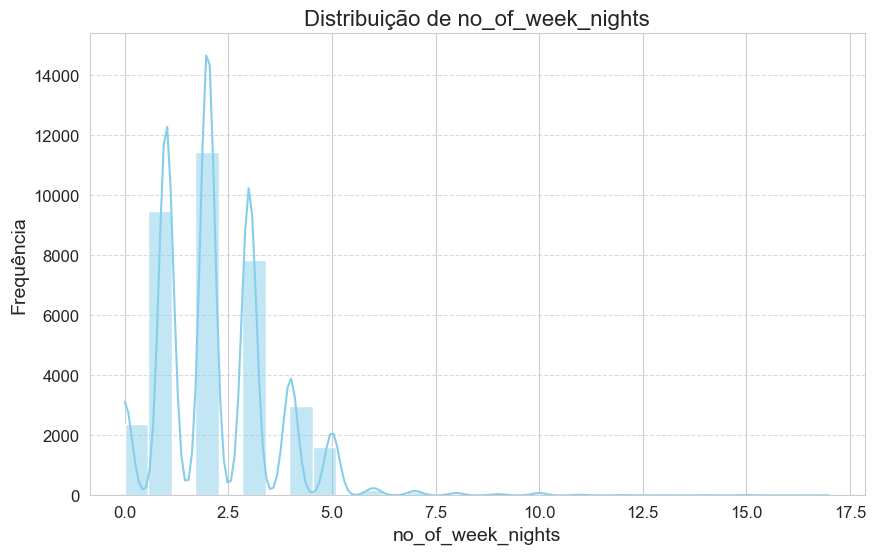

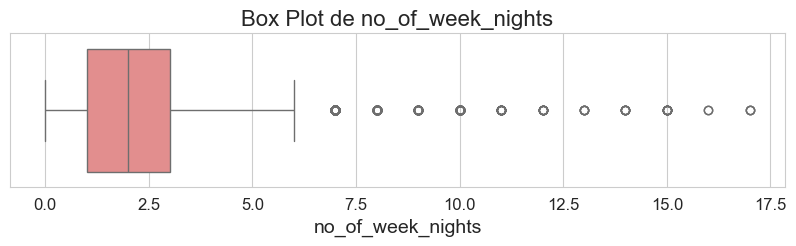


--- Análise da Coluna Quantitativa: `required_car_parking_space` ---

Estatísticas Descritivas:


count    36275.000000
mean         0.030986
std          0.173281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: required_car_parking_space, dtype: float64

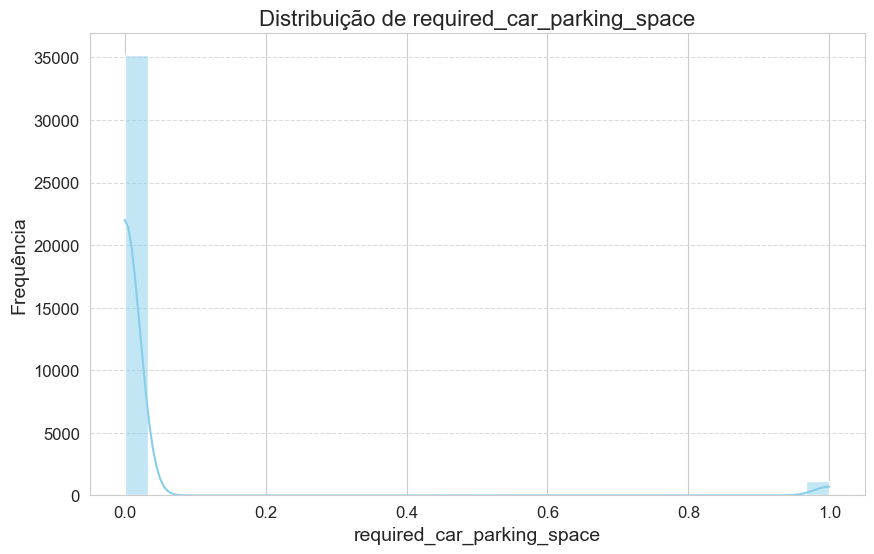

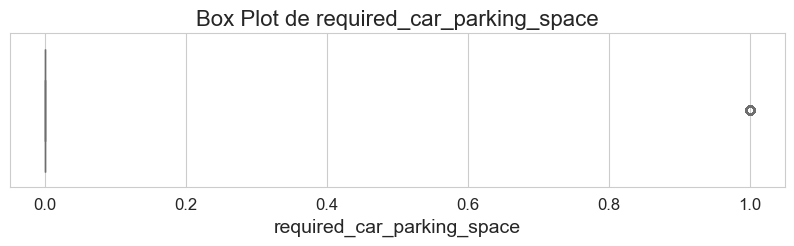


--- Análise da Coluna Quantitativa: `lead_time` ---

Estatísticas Descritivas:


count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

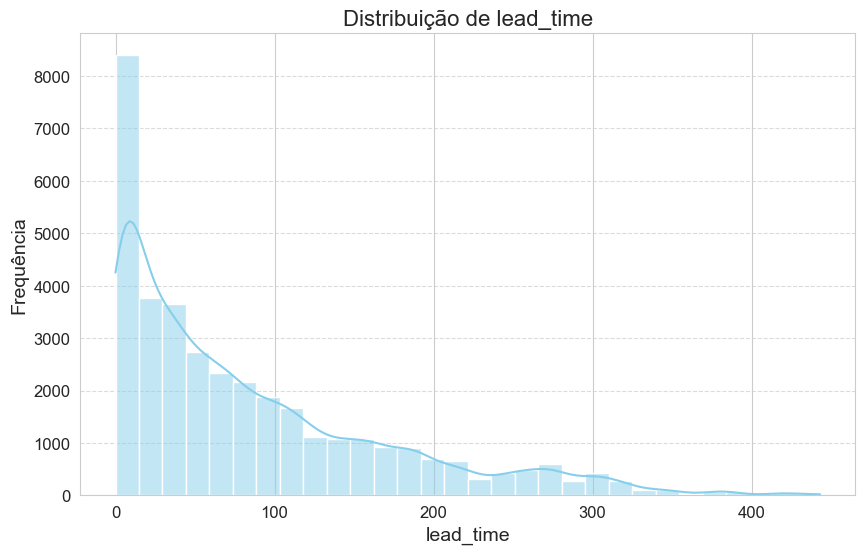

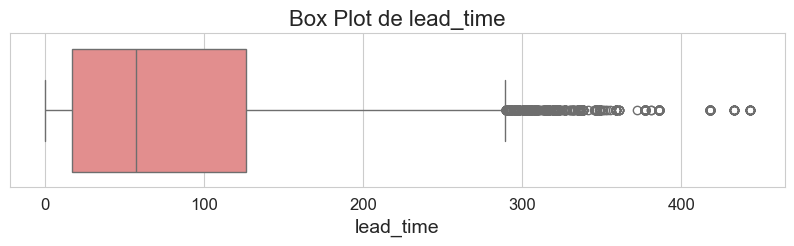


--- Análise da Coluna Quantitativa: `arrival_year` ---

Estatísticas Descritivas:


count    36275.000000
mean      2017.820427
std          0.383836
min       2017.000000
25%       2018.000000
50%       2018.000000
75%       2018.000000
max       2018.000000
Name: arrival_year, dtype: float64

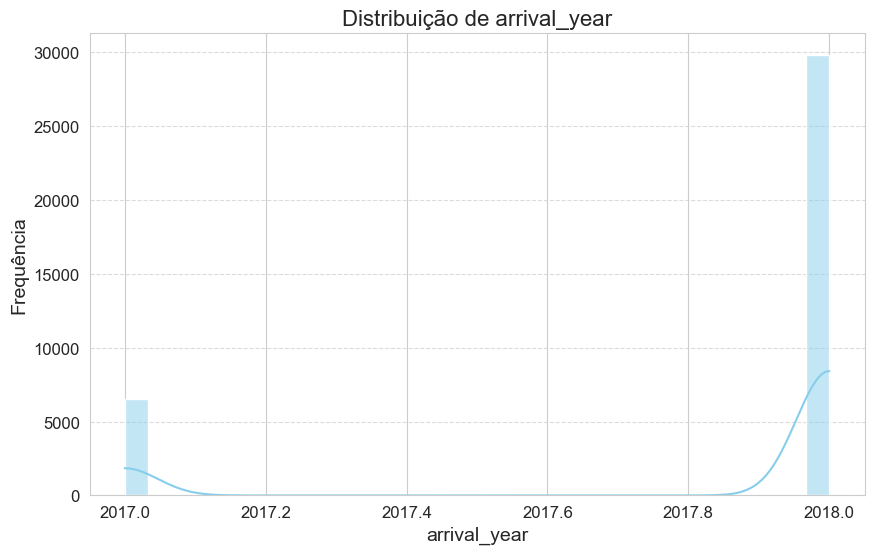

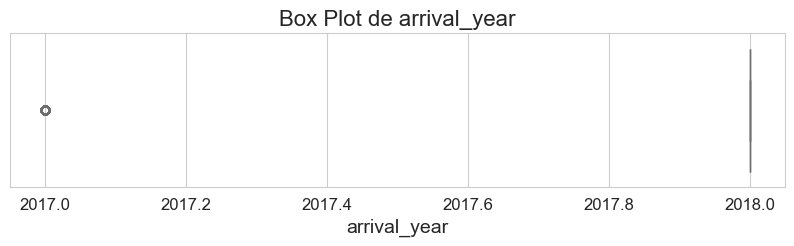


--- Análise da Coluna Quantitativa: `arrival_month` ---

Estatísticas Descritivas:


count    36275.000000
mean         7.423653
std          3.069894
min          1.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: arrival_month, dtype: float64

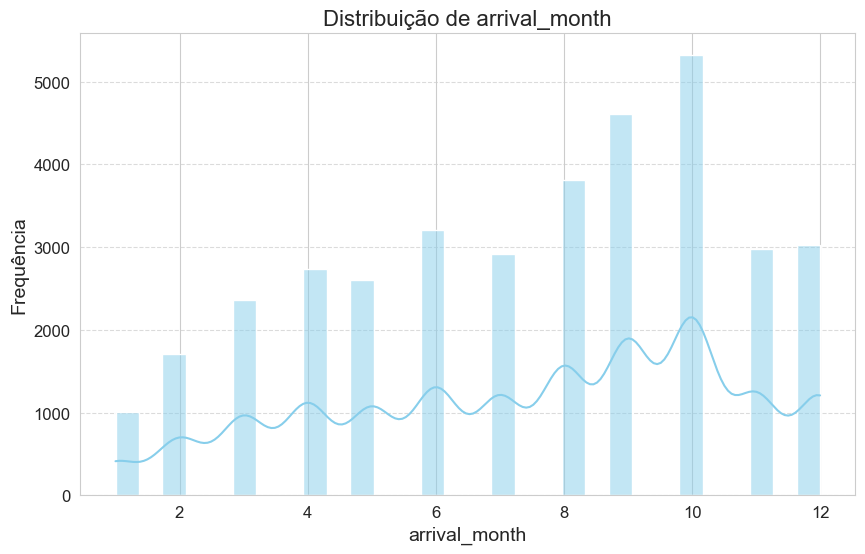

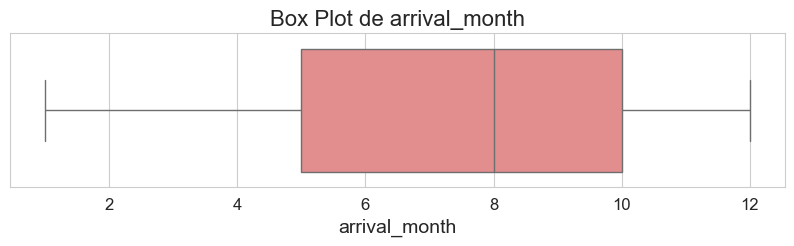


--- Análise da Coluna Quantitativa: `arrival_date` ---

Estatísticas Descritivas:


count    36275.000000
mean        15.596995
std          8.740447
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date, dtype: float64

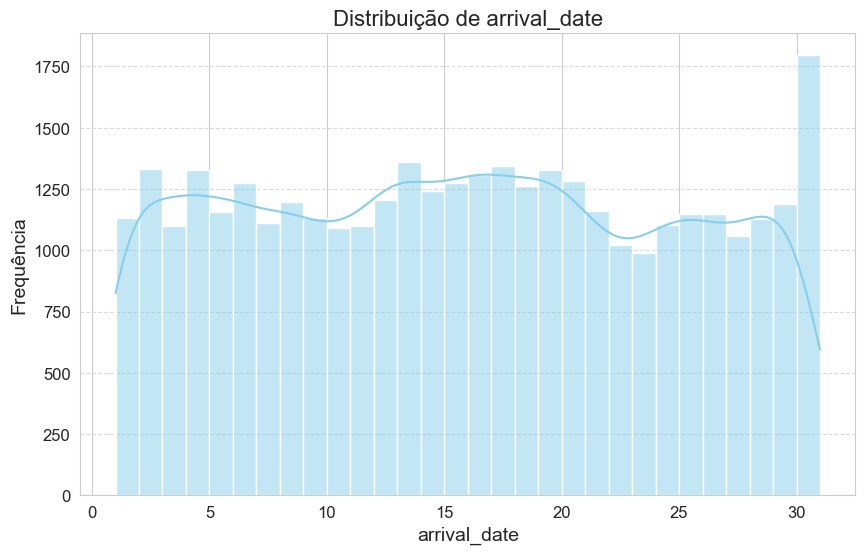

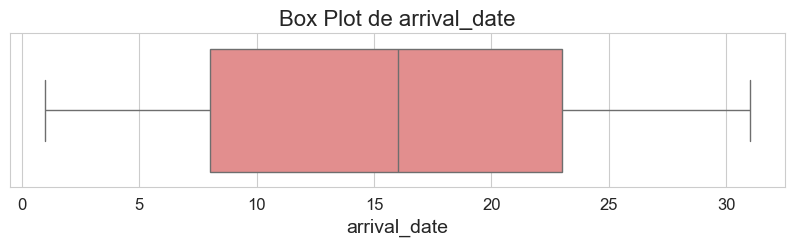


--- Análise da Coluna Quantitativa: `repeated_guest` ---

Estatísticas Descritivas:


count    36275.000000
mean         0.025637
std          0.158053
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: repeated_guest, dtype: float64

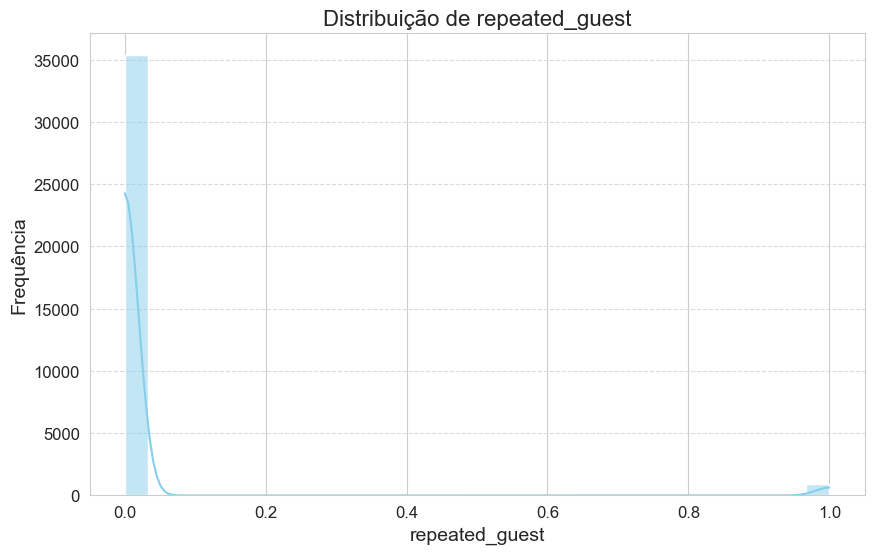

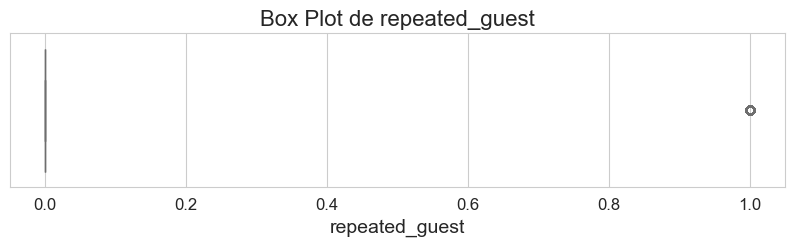


--- Análise da Coluna Quantitativa: `no_of_previous_cancellations` ---

Estatísticas Descritivas:


count    36275.000000
mean         0.023349
std          0.368331
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: no_of_previous_cancellations, dtype: float64

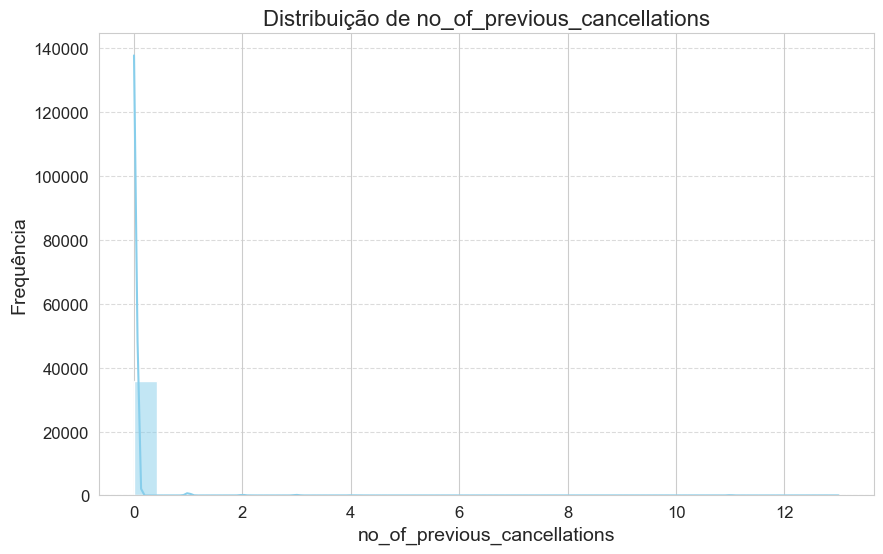

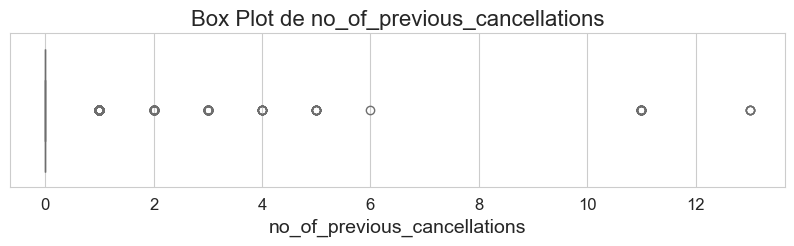


--- Análise da Coluna Quantitativa: `no_of_previous_bookings_not_canceled` ---

Estatísticas Descritivas:


count    36275.000000
mean         0.153411
std          1.754171
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: no_of_previous_bookings_not_canceled, dtype: float64

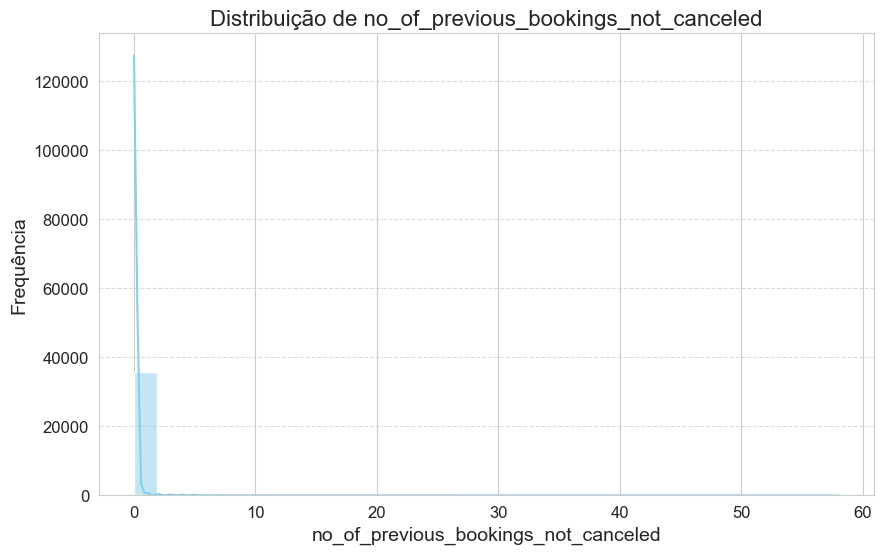

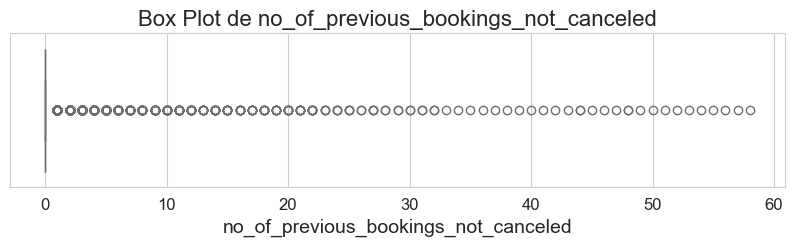


--- Análise da Coluna Quantitativa: `avg_price_per_room` ---

Estatísticas Descritivas:


count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

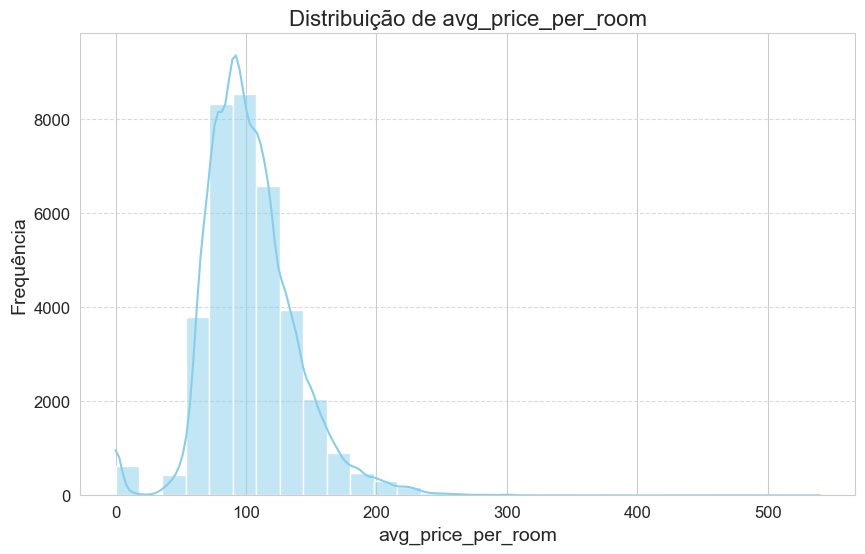

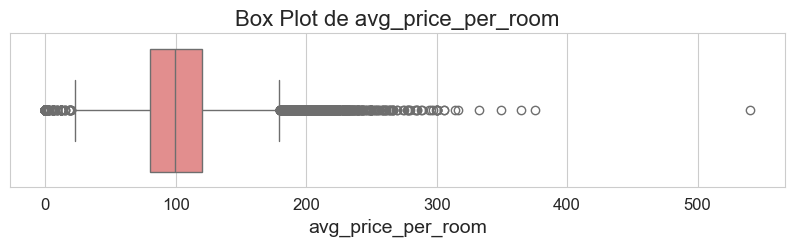


--- Análise da Coluna Quantitativa: `no_of_special_requests` ---

Estatísticas Descritivas:


count    36275.000000
mean         0.619655
std          0.786236
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: no_of_special_requests, dtype: float64

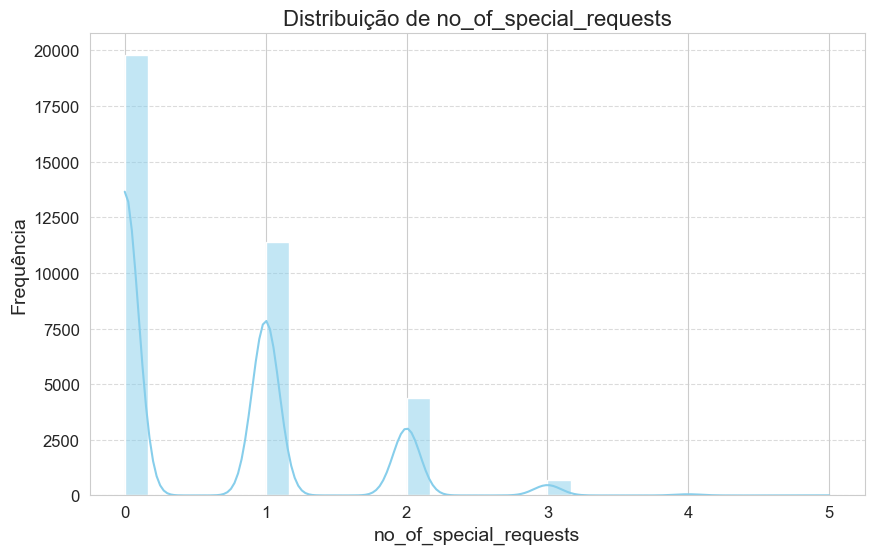

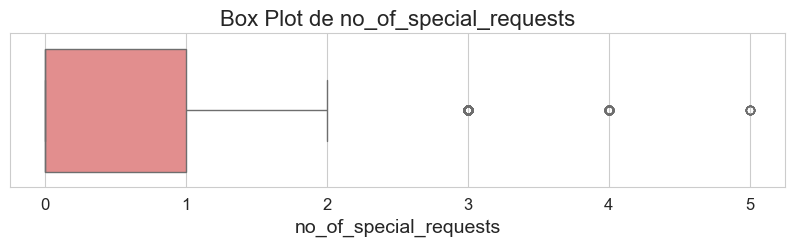


##### Análise para Variáveis Categóricas #####

--- Análise da Coluna Categórica: `type_of_meal_plan` ---

Contagem de Frequência:
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

Número de valores únicos: 4


C:\Users\Danmc\AppData\Local\Temp\ipykernel_27480\334796330.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=value_counts.index, palette='viridis')


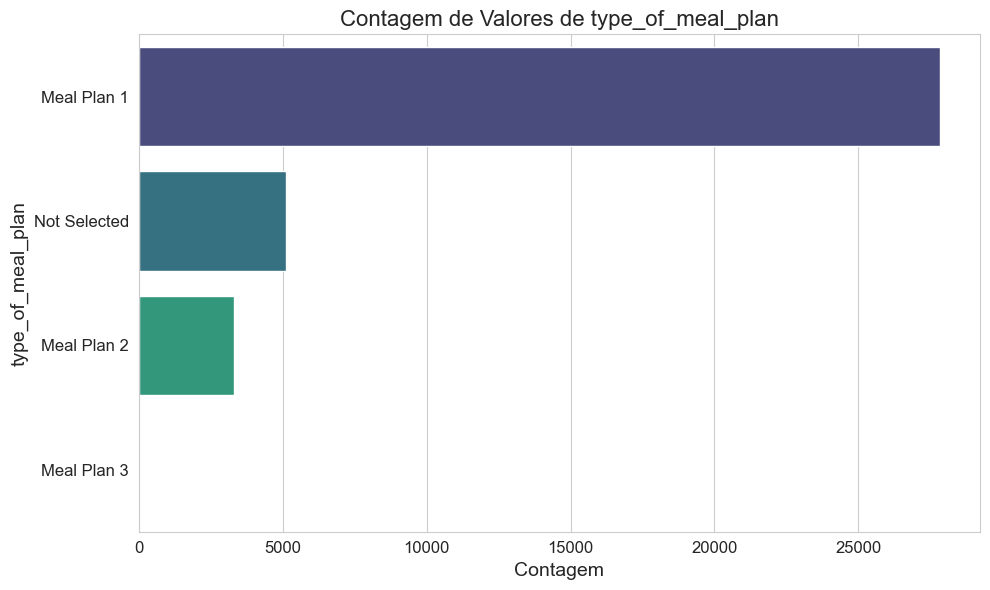


--- Análise da Coluna Categórica: `room_type_reserved` ---

Contagem de Frequência:
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

Número de valores únicos: 7


C:\Users\Danmc\AppData\Local\Temp\ipykernel_27480\334796330.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=value_counts.index, palette='viridis')


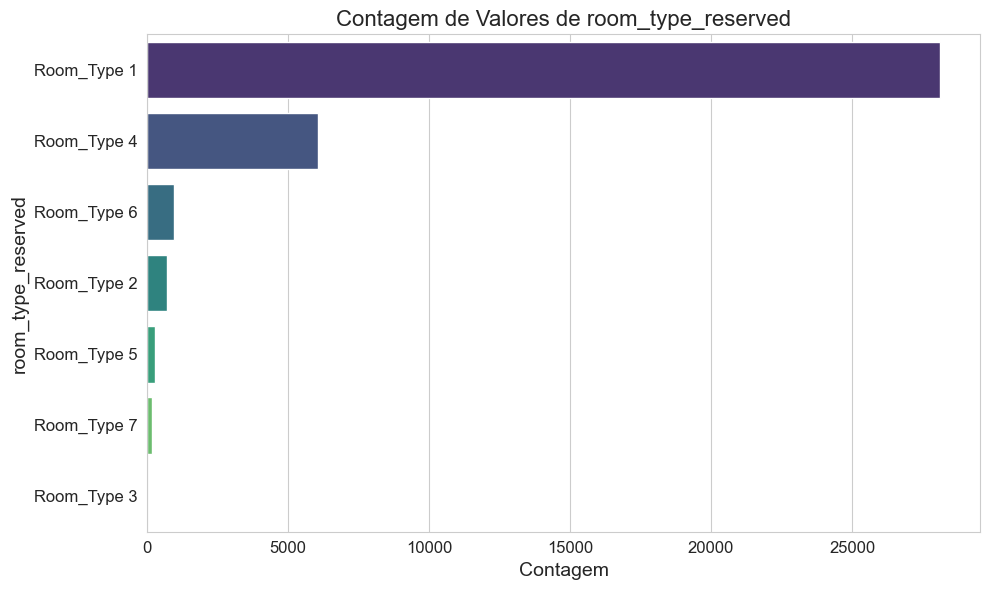


--- Análise da Coluna Categórica: `market_segment_type` ---

Contagem de Frequência:
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

Número de valores únicos: 5


C:\Users\Danmc\AppData\Local\Temp\ipykernel_27480\334796330.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=value_counts.index, palette='viridis')


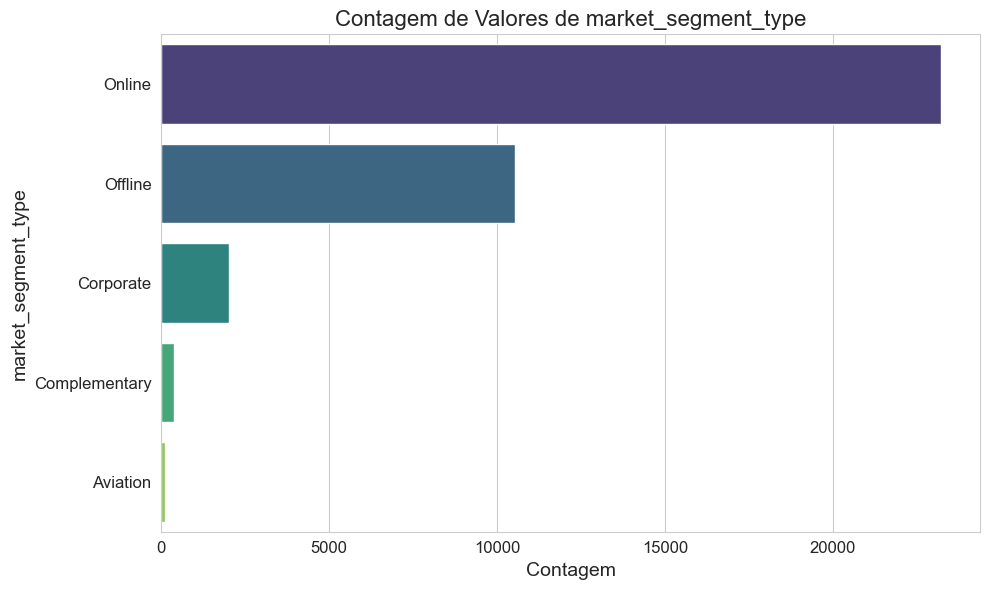


--- Análise da Coluna Categórica: `booking_status` ---

Contagem de Frequência:
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

Número de valores únicos: 2


C:\Users\Danmc\AppData\Local\Temp\ipykernel_27480\334796330.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=value_counts.index, palette='viridis')


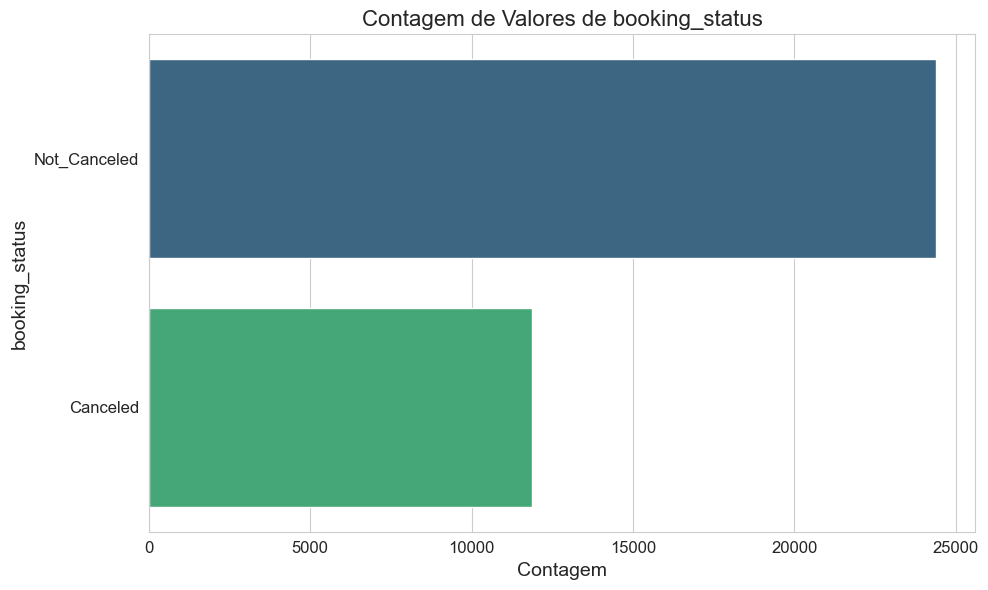


--- Análise Univariada Separada Concluída ---


In [ ]:
if df is not None:
    # --- Separação de Variáveis ---
    # Identificar variáveis quantitativas e categóricas
    quantitative_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Remover 'Booking_ID' das colunas de análise, pois é um identificador único e não uma feature para modelagem
    # nem para análise de distribuição diretamente.
    if 'Booking_ID' in quantitative_cols:
        quantitative_cols.remove('Booking_ID')
    elif 'Booking_ID' in categorical_cols:
        categorical_cols.remove('Booking_ID')

    print(f"\n--- Variáveis Identificadas ---")
    print(f"Variáveis Quantitativas ({len(quantitative_cols)}): {quantitative_cols}")
    print(f"Variáveis Categóricas ({len(categorical_cols)}): {categorical_cols}")

    """
    ### 2.1 Análise de Variáveis Quantitativas

    Para as variáveis numéricas, utilizaremos:
    - **Estatísticas Descritivas:** `describe()` para obter métricas como média, desvio padrão, mínimo, máximo e quartis.
    - **Histogramas:** Para visualizar a distribuição dos dados e identificar a forma (simétrica, assimétrica, multimodal).
    - **Box Plots:** Para identificar a mediana, quartis e a presença de outliers.
    """

    print("\n##### Análise para Variáveis Quantitativas #####")
    for col in quantitative_cols:
        print(f"\n--- Análise da Coluna Quantitativa: `{col}` ---")
        print("\nEstatísticas Descritivas:")
        display(df[col].describe())

        # Histograma para distribuição
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribuição de {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona grade ao eixo y para melhor leitura
        plt.show()

        # Box Plot para identificar outliers e distribuição
        plt.figure(figsize=(10, 2)) 
        sns.boxplot(x=df[col], color='lightcoral')
        plt.title(f'Box Plot de {col}')
        plt.xlabel(col)
        plt.show()

    """
    ### 2.2 Análise de Variáveis Categóricas

    Para as variáveis categóricas, utilizaremos:
    - **Contagem de Frequência:** Para ver a distribuição de cada categoria.
    - **Gráficos de Barras:** Para visualizar a proporção de cada categoria. Limitaremos a exibição para as 15 categorias mais frequentes se a coluna tiver muitas categorias únicas.
    """

    print("\n##### Análise para Variáveis Categóricas #####")
    for col in categorical_cols:
        print(f"\n--- Análise da Coluna Categórica: `{col}` ---")
        print("\nContagem de Frequência:")
        value_counts = df[col].value_counts(dropna=False) # Inclui valores NaN na contagem
        print(value_counts)
        print(f"\nNúmero de valores únicos: {df[col].nunique()}")

        # Gráfico de barras para contagem de frequência
        plt.figure(figsize=(10, 6))
        # Ajusta a exibição para não sobrecarregar o gráfico se houver muitas categorias
        if df[col].nunique() > 15:
            sns.countplot(y=col, data=df, order=value_counts.index[:15], palette='viridis')
            plt.title(f'Contagem dos 15 Principais Valores de {col}')
        else:
            sns.countplot(y=col, data=df, order=value_counts.index, palette='viridis')
            plt.title(f'Contagem de Valores de {col}')
        plt.xlabel('Contagem')
        plt.ylabel(col)
        plt.tight_layout() # Ajusta o layout para evitar sobreposição
        plt.show()

    print("\n--- Análise Univariada Separada Concluída ---")


##  3. Pré-processamento para Modelagem

In [ ]:


    # 1. Cópia do DataFrame para não alterar o original
    df_model = df.copy()
    print("\n--- Iniciando Pré-processamento de Dados para Modelagem ---")

    # 2. Transformação da variável alvo (`booking_status`) para formato binário
    # 'Canceled' (cancelado) será 1 e 'Not_Canceled' (não cancelado) será 0.
    # Outros status como 'No-Show' serão mapeados para 0 (não cancelado) para esta análise binária.
    if 'No-Show' in df_model['booking_status'].unique():
        print(f"Alerta: 'No-Show' encontrado na coluna 'booking_status'. Será mapeado para 0 (não cancelado) para esta análise binária.")
        df_model['booking_status'] = df_model['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0, 'No-Show': 0})
    else:
        df_model['booking_status'] = df_model['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

    print(f"Status de reserva mapeado: 'Canceled' -> 1, 'Not_Canceled'/'No-Show' -> 0")
    print(df_model['booking_status'].value_counts())


    # 3. Identificar colunas categóricas para codificação
    # Excluímos 'Booking_ID' novamente, pois é um identificador e não uma feature.
    # A variável alvo 'booking_status' já foi tratada e transformada em numérica.
    categorical_cols_for_encoding = df_model.select_dtypes(include=['object']).columns.tolist()
    if 'Booking_ID' in categorical_cols_for_encoding:
        categorical_cols_for_encoding.remove('Booking_ID')

    print(f"\nColunas categóricas para Label Encoding: {categorical_cols_for_encoding}")

    # 4. Aplicar Label Encoding nas colunas categóricas
    # Label Encoding é adequado quando não há ordem intrínseca entre as categorias ou quando o modelo lida bem com isso (como árvores).
    # Para features com muitas categorias ou ordem, One-Hot Encoding ou Ordinal Encoding seriam alternativas, dependendo do contexto.
    le = LabelEncoder()
    for col in categorical_cols_for_encoding:
        # Preencher NaNs se houver antes da codificação, para evitar erro de `fit_transform`.
        # Uma estratégia simples é preencher com uma categoria 'Unknown' ou a moda. Aqui, usaremos 'Unknown'.
        if df_model[col].isnull().any():
            df_model[col] = df_model[col].fillna('Unknown')
            print(f"Preenchidos NaNs na coluna '{col}' com 'Unknown' antes do Label Encoding.")
        df_model[col] = le.fit_transform(df_model[col])
        print(f"Coluna '{col}' codificada com Label Encoding.")

    # 5. Seleção de features (X) e variável alvo (y)
    # Removemos 'Booking_ID' pois é um identificador e não deve ser usado como feature para o modelo.
    X = df_model.drop(['Booking_ID', 'booking_status'], axis=1)
    y = df_model['booking_status']
    print(f"\nFormato de X (features): {X.shape}")
    print(f"Formato de y (target): {y.shape}")

    # 6. Separação dos dados em conjuntos de treino e teste
    # Usamos stratify=y para garantir que a proporção de classes do target seja a mesma em treino e teste,
    # o que é crucial em datasets desbalanceados. O test_size define a proporção de dados para teste (20%).
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    print(f"\nConjunto de Treino: X_train {X_train.shape}, y_train {y_train.shape}")
    print(f"Conjunto de Teste: X_test {X_test.shape}, y_test {y_test.shape}")
    print(f"Proporção de cancelados no treino: {y_train.sum() / len(y_train):.2f}")
    print(f"Proporção de cancelados no teste: {y_test.sum() / len(y_test):.2f}")



--- Iniciando Pré-processamento de Dados para Modelagem ---
Status de reserva mapeado: 'Canceled' -> 1, 'Not_Canceled'/'No-Show' -> 0
booking_status
0    24390
1    11885
Name: count, dtype: int64

Colunas categóricas para Label Encoding: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
Coluna 'type_of_meal_plan' codificada com Label Encoding.
Coluna 'room_type_reserved' codificada com Label Encoding.
Coluna 'market_segment_type' codificada com Label Encoding.

Formato de X (features): (36275, 17)
Formato de y (target): (36275,)

Conjunto de Treino: X_train (29020, 17), y_train (29020,)
Conjunto de Teste: X_test (7255, 17), y_test (7255,)
Proporção de cancelados no treino: 0.33
Proporção de cancelados no teste: 0.33


## 4. Modelagem e Avaliação


--- Treinando o Modelo RandomForestClassifier ---
Modelo treinado com sucesso!

--- Avaliação do Modelo ---

Relatório de Classificação:
                  precision    recall  f1-score   support

Not Canceled (0)       0.91      0.95      0.93      4878
    Canceled (1)       0.89      0.82      0.85      2377

        accuracy                           0.91      7255
       macro avg       0.90      0.88      0.89      7255
    weighted avg       0.91      0.91      0.91      7255


Matriz de Confusão:


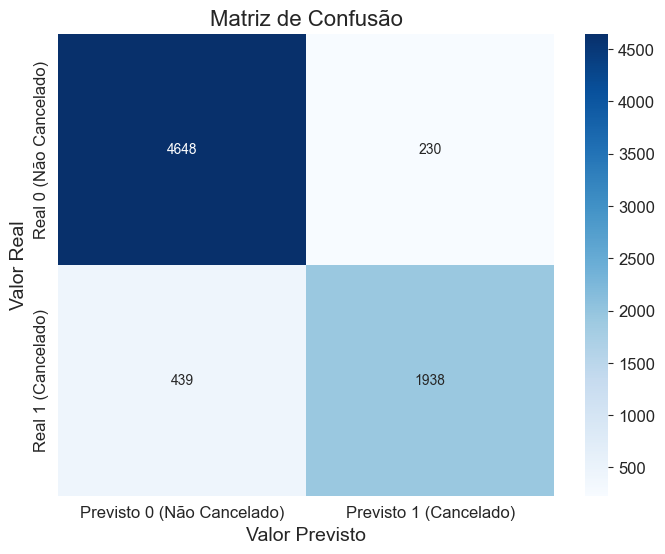


Importância das Features:


lead_time                               0.324437
avg_price_per_room                      0.161800
no_of_special_requests                  0.099146
arrival_date                            0.092359
arrival_month                           0.080562
market_segment_type                     0.052347
no_of_week_nights                       0.050957
no_of_weekend_nights                    0.038091
arrival_year                            0.025643
no_of_adults                            0.024626
type_of_meal_plan                       0.016795
room_type_reserved                      0.015440
no_of_children                          0.006973
required_car_parking_space              0.006605
repeated_guest                          0.002672
no_of_previous_bookings_not_canceled    0.001311
no_of_previous_cancellations            0.000237
dtype: float64

C:\Users\Danmc\AppData\Local\Temp\ipykernel_27480\4280026222.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='coolwarm')


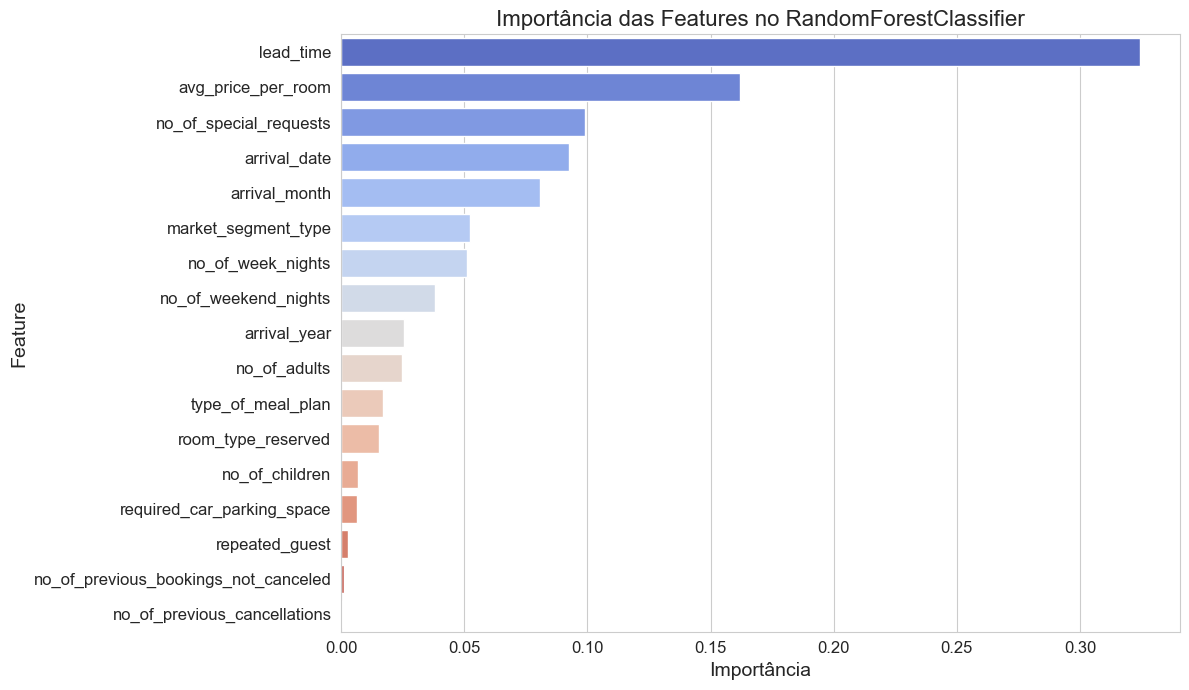

In [ ]:
# 7. Treinamento de um modelo inicial (RandomForestClassifier)
print("\n--- Treinando o Modelo RandomForestClassifier ---")
# n_estimators: número de árvores na floresta.
# random_state: para reprodutibilidade dos resultados.
# n_jobs=-1: para usar todos os núcleos da CPU disponíveis para treinamento paralelo.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

# Realizar previsões no conjunto de teste
y_pred = model.predict(X_test)

# 8. Avaliação do modelo
print("\n--- Avaliação do Modelo ---")

print("\nRelatório de Classificação:")
# O classification_report fornece precisão, recall, f1-score e suporte para cada classe.
report = classification_report(y_test, y_pred, target_names=['Not Canceled (0)', 'Canceled (1)'])
print(report)

print("\nMatriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
# Visualizar a matriz de confusão para entender os acertos e erros do modelo.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto 0 (Não Cancelado)', 'Previsto 1 (Cancelado)'],
            yticklabels=['Real 0 (Não Cancelado)', 'Real 1 (Cancelado)'])
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Exibir a importância das features
print("\nImportância das Features:")
# A importância das features indica o quanto cada feature contribuiu para a redução da impureza das árvores.
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
display(feature_importances) # Usar display() para melhor formatação

# Visualizar a importância das features
plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='coolwarm')
plt.title('Importância das Features no RandomForestClassifier')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

